<a href="https://colab.research.google.com/github/jorgewellison/classifiers-tcc/blob/main/Naive-bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Configurações iniciais**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importação das bibliotecas**

In [10]:
import pandas as pd
from numpy import mean
from numpy import std
from numpy import nper
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold


**Importando previsores e classe (tratados no pré-processamento)**

previsores -> variáveis independentes - X

classe -> variável dependente - y

In [11]:
previsores = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/previsores.csv") 
classe = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/classe.csv") 

**Criação do KFold com 10 iterações e Shuffle para embaralhar as linhas, desagrupando os municipios de seus estados**

In [12]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

**Criação e treinamento do modelo (geração de tabela de probabilidades)**

In [17]:
naive_bayes = GaussianNB()
naive_bayes.fit(previsores, classe.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

**Testes com validação cruzada**

In [18]:
#a função cross_val_score recebe por parâmetro o modelo
#todos os dados para treino, os dados de classes, a quandidade de fodls e o metodo de avaliação
scores = cross_val_score(naive_bayes, previsores, classe.values.ravel(), cv=cv, scoring='accuracy')

**Predição e Matriz de confusão**

In [19]:
predictions = cross_val_predict(naive_bayes, previsores, classe.values.ravel(), cv=cv)
confusao = confusion_matrix(classe, predictions)
confusao

array([[3049,   93,  442],
       [1237,  116,  314],
       [ 199,   18,   97]])

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


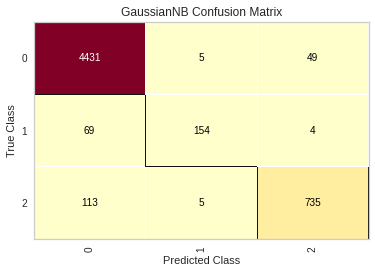

In [21]:
v = ConfusionMatrix(GaussianNB())
v.fit(previsores, classe)
v.score(previsores, predictions)
v.poof()

**Imprimindo os resultados dos folds**

In [22]:
scores

array([0.60143627, 0.59425494, 0.5529623 , 0.5978456 , 0.56732496,
       0.60791367, 0.49640288, 0.64388489, 0.59352518, 0.60611511])

**Taxa de acerto**

In [23]:
scores.mean() #porcentagem de precisão


0.5861665784069333

**Métricas de avaliação**

In [25]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.586 (0.038)


**Taxa de erro**

In [26]:
taxa_erro = 1 - scores.mean()
taxa_erro

0.4138334215930667